Guido's Email: <br> Hi,

Now that you have successfully imported, prepared and explored the data you are ready to start exploring some possible tools for your analysis. When you worked in R you used the caret package for many of your machine learning and data mining tasks. Python has a similar library called Sci-Kit Learn that the client has specifically asked us to use because it is likely to be compatible a custom software solution they plan to deploy.

In this task you’ll build your models just as you have done previously, but with a different set of tools. As you progress remember the following:

Let the data tell the story – don't make any assumptions.
It is often best to build three or more models and compare the results.
Make sure you have chosen the correct tools for the type of data you have.
I suggest you start this task with a quick orientation on Sci-Kit Learn to become familiar with the benefits of using it and how to use it effectively for this project. 

GR 

Guido Rossum
Senior Data Scientist
Credit One
www.creditonellc.com

In [2]:
#imports
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_validation
#from sklearn.cross_validation import train_test_split
#from sklearn import cross_validation

In [3]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

Removing some small subgroups from certain demographics as they may up a very small portion and removing them could help improve our model's accuracy

In [424]:
rawDataFilter = rawData[((rawData.EDUCATION==1)|(rawData.EDUCATION==2)|(rawData.EDUCATION==3))&(rawData.MARRIAGE>0)]
rawDataFilter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29478 entries, 0 to 29999
Data columns (total 25 columns):
ID                            29478 non-null int64
LIMIT_BAL                     29478 non-null int64
SEX                           29478 non-null int64
EDUCATION                     29478 non-null int64
MARRIAGE                      29478 non-null int64
AGE                           29478 non-null int64
PAY_0                         29478 non-null int64
PAY_2                         29478 non-null int64
PAY_3                         29478 non-null int64
PAY_4                         29478 non-null int64
PAY_5                         29478 non-null int64
PAY_6                         29478 non-null int64
BILL_AMT1                     29478 non-null int64
BILL_AMT2                     29478 non-null int64
BILL_AMT3                     29478 non-null int64
BILL_AMT4                     29478 non-null int64
BILL_AMT5                     29478 non-null int64
BILL_AMT6               

In [474]:
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [503]:
#features
#features = rawData.iloc[:,12:23]
features = rawDataFilter.iloc[:,[1,12,13,15,18,19,20,21,22,23]]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT4,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,3913,3102,0,0,689,0,0,0,0
1,120000,2682,1725,3272,0,1000,1000,1000,0,2000
2,90000,29239,14027,14331,1518,1500,1000,1000,1000,5000
3,50000,46990,48233,28314,2000,2019,1200,1100,1069,1000
4,50000,8617,5670,20940,2000,36681,10000,9000,689,679


In [530]:
x = rawDataFilter.iloc[:,[1,2,3,4,5,12,13,14,15,16,18,19,20,21,22,23]]
y = rawDataFilter['default payment next month']

clf = LassoCV().fit(x, y)
importance = np.abs(clf.coef_)
print(importance)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[4.73858353e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.24406067e-07 1.75758761e-07 1.51671283e-08
 1.45629336e-08 5.28606025e-07 1.04156534e-06 3.35556211e-07
 2.93184850e-07 5.79275873e-07 2.02153980e-07 1.39590046e-07]


testing importance of values when looking at defaulting

In [527]:
x = rawDataFilter.iloc[:,[1,2,3,4,5,12,13,14,15,16,17]]
y = rawDataFilter.BILL_AMT6

clf = LassoCV().fit(x, y)
importance = np.abs(clf.coef_)
print(importance)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.02100121 0.         0.         0.         0.         0.04292155
 0.19775892 0.49269193]


*Key features always seem to be pay/bill amount, maybe limit balance

In [504]:
#dependent variable
depVar = rawDataFilter['BILL_AMT6']

In [505]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT4,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,3913,3102,0,0,689,0,0,0,0
1,120000,2682,1725,3272,0,1000,1000,1000,0,2000
2,90000,29239,14027,14331,1518,1500,1000,1000,1000,5000
3,50000,46990,48233,28314,2000,2019,1200,1100,1069,1000
4,50000,8617,5670,20940,2000,36681,10000,9000,689,679


In [506]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0        0
1     3261
2    15549
3    29547
4    19131
Name: BILL_AMT6, dtype: int64

In [507]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT4  PAY_AMT1  PAY_AMT2  \
29898      20000      14498      13968      17168         0      2000   
29899     140000     142044     142087     140057      6100      5528   
29900      20000      16809          0          0         0         0   
29901      50000      50845      48750      50590         0      6556   
29902     170000      10392     168088     161351    168096      6409   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
29898      2000      1000      1000      1000  
29899      4500      3500      4000      4000  
29900         0         0         0         0  
29901      3250      1563      1208       781  
29902      7335      4448      4519      5003  


In [508]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29898     18295
29899    100873
29900         0
29901     49387
29902    124746
Name: BILL_AMT6, dtype: int64

In [509]:
X_test.shape

(100, 10)

In [510]:
X_train.shape

(1000, 10)

In [511]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

Due to some potential correlation we saw in our initial deep dive we are going to be removing bill amt 3 and 5 and adding some demographic info we found potentially useful from before

In [512]:
#features
features = rawDataFilter.iloc[:,[1,12,13,15,18,19,20,21,22,23]]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT4,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,3913,3102,0,0,689,0,0,0,0
1,120000,2682,1725,3272,0,1000,1000,1000,0,2000
2,90000,29239,14027,14331,1518,1500,1000,1000,1000,5000
3,50000,46990,48233,28314,2000,2019,1200,1100,1069,1000
4,50000,8617,5670,20940,2000,36681,10000,9000,689,679


In [513]:
#dependent variable
print(depVar)

0             0
1          3261
2         15549
3         29547
4         19131
5         20024
6        473944
7           567
8          3719
9         13912
10         3731
11        13668
12         2870
13        36894
14        55512
15        30211
16        19104
17       195599
18            0
19            0
20          930
21          316
22        46012
23            0
24         8292
25        30046
26         -189
27        19617
28          257
29        11400
          ...  
29970     19487
29971     73612
29972    148482
29973         0
29974      1324
29975      1824
29976     46934
29977    147954
29978    210675
29979         0
29980     19694
29981     14647
29982     14329
29983      1719
29984      3319
29985         0
29986         0
29987     97353
29988    179687
29989         0
29990     46121
29991      2500
29992         0
29993     55004
29994     81158
29995     15980
29996         0
29997     19357
29998     48944
29999     15313
Name: BILL_AMT6, Length:

In [514]:
modelRF.fit(X_train,y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [515]:
modelSVR.fit(X_train,y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [516]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [517]:
print(cross_val_score(modelRF, X_train, y_train)) 

[0.83124444 0.91168957 0.91713348]


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [518]:
# The default metric for model.score for Regression models in Sci-Kit Learn is R-Squared.
modelRF.score(X_train,y_train)

0.983440450848228

In [519]:
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[0.84016629 0.90419409 0.91148673]


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9801956100030221

In [520]:
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWar

[-0.09010998 -0.19069774 -0.09434549]


-0.12278801466900413

In [521]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[0.66656678 0.83473623 0.85210584]


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8868762161340811

In [522]:
predictions = modelRF.predict(X_test)

In [523]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [524]:
predRsquared = r2_score(y_test,predictions)

In [525]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.725
RMSE: 27982.857


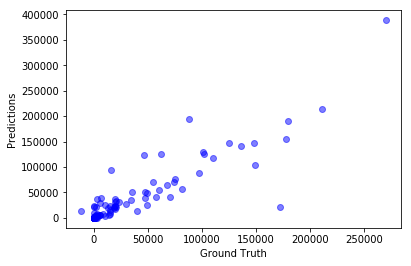

In [526]:
plt.scatter(y_test, predictions, color=["blue"], alpha = 0.5)
#plt.axis((0,1,0,1))
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();